# Classifying spam in emails using Naive Bayes Methods


The Naive Bayes' Theorem finds the probability of an event occurring given the probability of another event that has already occurred.

According to the Scikit-Learn documentation, 

> Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the "naive" assumption of conditional independence between every pair of features given the value of the class variable. 

So given a class variable *Y* and a dependent feature vector *X*<sub>1</sub>... *X*<sub>n</sub>:

![image.png](./images/bayes_theorem.png)

Assuming conditional independence such that:

![image.png](./images/assumption.png)

For all *i* this relationship is simplified to

![image.png](./images/simplification.png)

Since *P(X*<sub>1</sub>,..., *X*<sub>N</sub>*)* is constant for each input, the following classification rule is valid:

![image.png](./images/classification.png)


1) Naive Bayes
2) Arvore de Decisão
3) Random Forest
4) Gradient Boost

## Libraries

For this part of the project, several python modules we're needed. **Pandas** was used for handling the data frames, **Seaborn** was used to improve report visualization, **scikit-learn** was used to extract features and for its classifiers.

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report


## Our Dataset
For this assignment, I used the [Spam Mails Dataset](https://www.kaggle.com/venky73/spam-mails-dataset) found on kaggle, which was retrieved from [Enron Spam](http://www2.aueb.gr/users/ion/data/enron-spam/). The data frame consists of several e-mail labeled 'ham' (legit emails) and spam. It can be observed bellow:

In [2]:
df = pd.read_csv("./data/preprocessed_spam_ham.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,label,text,label_num
0,0,605,ham,subject enron methanol meter follow note gave ...,0
1,1,2349,ham,subject hpl nom januari attach file hplnol xls...,0
2,2,3624,ham,subject neon retreat ho ho ho wonder time year...,0
3,3,4685,spam,subject photoshop window offic cheap main tren...,1
4,4,2030,ham,subject indian spring deal book teco pvr reven...,0


## Exploratory Data Analysis

As seen bellow there are way more legit emails then spam, to handle with the imbalanced dataset we're going to resample it so to use it in the *Multinomial Naive Bayes* and we're also going to use the *Complement Naive Bayes*, which is particularly suited for imbalanced data sets.

In [3]:
df_spam = df[df['label']=='spam']
df_ham = df[df['label']=='ham']

print('Amount of hams: ', len(df_ham),' Amount of spams: ', len(df_spam))

Amount of hams:  3672  Amount of spams:  1499


## Multinomial Naive Bayes

### Resampling data
Throught the function *resample* in the **scikit-learn** module, observations in the larger class (hams) will be randomly removed to prevent its signal from dominating the learning algorithm.

In [4]:
df_ham_downsampled = resample(df_ham, replace=False, n_samples=len(df_spam), random_state=42)
resampled_df = pd.concat([df_ham_downsampled, df_spam])

### Train and Test Split 

Through the function *train_test_split* in the **scikit-learn** module, we will split the data frame in proportions 20-80.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(resampled_df['text'], resampled_df['label_num'], test_size = 0.2, random_state = 42)

### Feature Extraction

We are going to use the function *TfidfVectorizer* from the **scikit-learn** module to extract features. Testar com **embeddings**, biblioteca: spacy

In [6]:
vectorizer = TfidfVectorizer()
features_train_transformed = vectorizer.fit_transform(x_train.tolist()) 
features_test_transformed  = vectorizer.transform(x_test)

### Train our Naive Bayes Model

We'll fit the **scikit-learning** *Naive Bayes* odel, the *MultinomialNB* function, to our *TF-IDF* vector version of x_train, and the true output labels stored in y_train.

In [7]:
classifier = MultinomialNB()
class_tree = RandomForestClassifier()
classifier.fit(features_train_transformed, y_train)
class_tree.fit(features_train_transformed, y_train)


RandomForestClassifier()

### Measuring Accuracy 

Finally, using our test sets we'll evalue the model accuracy using built-in functions from the **scikit** library.

Accuracy Score : 0.9733333333333334
F-Measure: 0.973


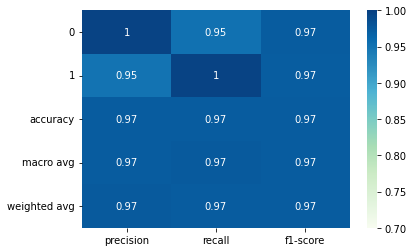

In [8]:
labels = classifier.predict(features_test_transformed)
actual = y_test.tolist()
score_2 = f1_score(actual, labels, average = 'binary')

print ('Accuracy Score :',accuracy_score(actual, labels))
print('F-Measure: %.3f' % score_2)


clf_report = classification_report(actual, labels, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="GnBu", vmin=0.70, vmax=1)
None

Accuracy Score : 0.9733333333333334
F-Measure: 0.973


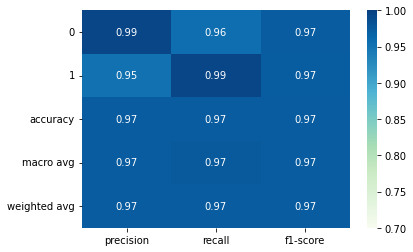

In [9]:
labels = class_tree.predict(features_test_transformed)
actual = y_test.tolist()
score_2 = f1_score(actual, labels, average = 'binary')

print ('Accuracy Score :',accuracy_score(actual, labels))
print('F-Measure: %.3f' % score_2)


clf_report = classification_report(actual, labels, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="GnBu", vmin=0.70, vmax=1)
None

## Complement Naive Bayes

### Train and Test Split 

Through the function *train_test_split* in the **scikit-learn** module, we will split the data frame in proportions 20-80.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label_num'], test_size = 0.2, random_state = 42)

### Feature Extraction

We are going to use the function *TfidfVectorizer* from the **scikit-learn** module to extract features.

In [11]:
x_train_list = x_train.tolist()
vectorizer = TfidfVectorizer()
features_train_transformed = vectorizer.fit_transform(x_train_list) #gives tf idf vector for x_train
features_test_transformed  = vectorizer.transform(x_test) #gives tf idf vector for x_test

### Train our Naive Bayes Model

We'll fit the **scikit-learning** *Naive Bayes* odel, the *MultinomialNB* function, to our *TF-IDF* vector version of x_train, and the true output labels stored in y_train.

In [12]:
classifier = ComplementNB()
classifier.fit(features_train_transformed, y_train)
None

### Measuring Accuracy 

Finally, using our test sets we'll evalue the model accuracy using built-in functions from the **scikit** library.### Measuring Accuracy 

Accuracy Score : 0.9719806763285024
F-Measure: 0.949


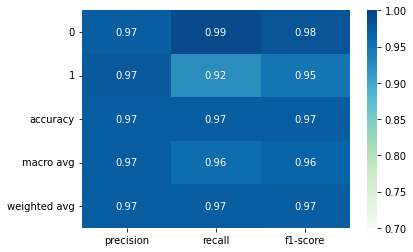

In [13]:
labels = classifier.predict(features_test_transformed)
actual = y_test.tolist()
score_2 = f1_score(actual, labels, average = 'binary')

print ('Accuracy Score :',accuracy_score(actual, labels))
print('F-Measure: %.3f' % score_2)

clf_report = classification_report(actual, labels, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="GnBu", vmin=0.70, vmax=1)
None

## A Few Conclusions

## References